In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import yfinance as yf

In [3]:
tlt = yf.download("TLT", start="2002-01-01", end="2022-06-30")

[*********************100%***********************]  1 of 1 completed


In [5]:
tlt['log_return'] = np.log(tlt['Adj Close'] / tlt['Adj Close'].shift(1))

In [7]:
tlt['day_of_month'] = tlt.index.day
tlt['year'] = tlt.index.year

In [8]:
tlt

,Open,High,Low,Close,Adj Close,Volume,log_return,day_of_month,year
Date,,,,,,,,,
2002-07-30,81.750000,81.900002,81.519997,81.519997,41.434555,6100,NaN,30,2002
2002-07-31,81.949997,82.800003,81.900002,82.529999,41.947903,29400,0.012313,31,2002
2002-08-01,82.540001,83.019997,82.540001,83.000000,42.186817,25000,0.005679,1,2002
2002-08-02,83.160004,84.099998,82.879997,83.849998,42.618835,52800,0.010189,2,2002
2002-08-05,84.040001,84.440002,83.849998,84.220001,42.806904,61100,0.004403,5,2002
...,...,...,...,...,...,...,...,...,...
2022-06-23,113.900002,115.169998,113.489998,114.139999,112.919762,20669200,0.008181,23,2022
2022-06-24,113.459999,114.169998,112.500000,112.559998,111.356659,18161300,-0.013939,24,2022
2022-06-27,111.220001,112.220001,111.160004,111.599998,110.406921,12053000,-0.008565,27,2022


In [9]:
grouped_by_day = tlt.groupby('day_of_month').log_return.mean()

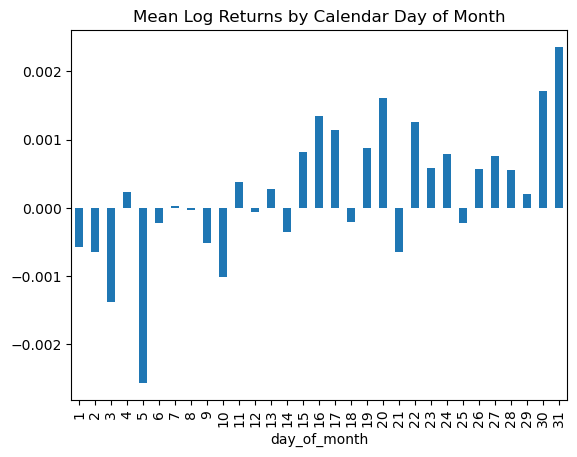

In [10]:
grouped_by_day.plot.bar(title='Mean Log Returns by Calendar Day of Month')

In [11]:
tlt['first_week_returns'] = 0.0
tlt.loc[tlt.day_of_month <= 7, 'first_week_returns'] = tlt[tlt.day_of_month <= 7].log_return

In [13]:
tlt['last_week_returns'] = 0.0
tlt.loc[tlt.day_of_month >= 23, 'last_week_returns'] = tlt[tlt.day_of_month >= 23].log_return

In [14]:
tlt['last_week_less_first_week'] = (tlt.last_week_returns - tlt.first_week_returns)

In [20]:
tlt.head(10)

,Open,High,Low,Close,Adj Close,Volume,log_return,day_of_month,year,first_week_returns,last_week_returns,last_week_less_first_week
Date,,,,,,,,,,,,
2002-07-30,81.750000,81.900002,81.519997,81.519997,41.434555,6100,NaN,30,2002,0.000000,NaN,NaN
2002-07-31,81.949997,82.800003,81.900002,82.529999,41.947903,29400,0.012313,31,2002,0.000000,0.012313,0.012313
2002-08-01,82.540001,83.019997,82.540001,83.000000,42.186817,25000,0.005679,1,2002,0.005679,0.000000,-0.005679
2002-08-02,83.160004,84.099998,82.879997,83.849998,42.618835,52800,0.010189,2,2002,0.010189,0.000000,-0.010189
2002-08-05,84.040001,84.440002,83.849998,84.220001,42.806904,61100,0.004403,5,2002,0.004403,0.000000,-0.004403
2002-08-06,83.870003,83.900002,83.220001,83.500000,42.440926,64900,-0.008586,6,2002,-0.008586,0.000000,0.008586
2002-08-07,83.599998,84.139999,83.360001,83.699997,42.542622,40300,0.002393,7,2002,0.002393,0.000000,-0.002393
2002-08-08,83.580002,83.769997,83.360001,83.699997,42.542622,40900,0.000000,8,2002,0.000000,0.000000,0.000000
2002-08-09,84.000000,84.879997,84.000000,84.879997,43.142334,35900,0.013998,9,2002,0.000000,0.000000,0.000000


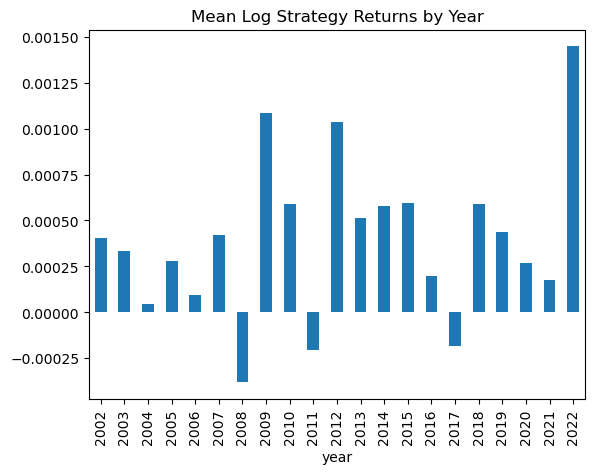

In [18]:
tlt.groupby('year').last_week_less_first_week.mean().plot.bar(title='Mean Log Strategy Returns by Year')

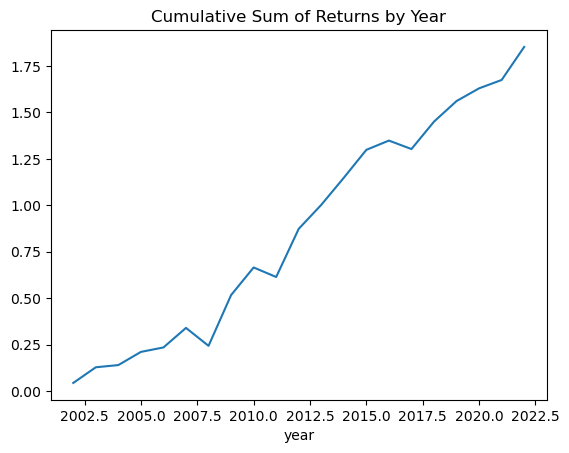

In [19]:
tlt.groupby('year').last_week_less_first_week.sum().cumsum().plot(title='Cumulative Sum of Returns by Year')